# Import the data set
First, let's import pandas (for visualization) and read the csv file for the data set of sports facilities in the neighborhoods

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

sports_data = pd.read_csv('sports.csv', low_memory = False)
sports_data.head()

,_id,id,name,type,park,location,surface_material,grandstand,inactive,Neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,7-Jan,40.454443,-80.008104
1,2,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,7-Jan,40.452400,-80.012531
2,3,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,7-Jan,40.452238,-80.012150
3,4,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,7-Jan,40.452075,-80.011767
4,5,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,28-Apr,40.414152,-80.022305


# Filter the 3 data sets
Next we filter the 3 data sets so that we are only looking at neighborhoods that have data in all sets and removing any values of NaN, or any condition values that equal "Dead" from the trees data set

In [24]:
trees_data = pd.read_csv('tree.csv', low_memory = False)
sports_data = pd.read_csv('sports.csv', low_memory = False)
arrests_data = pd.read_csv('arrests.csv', low_memory = False)

name_column = 'Neighborhood'

trees_of_heaven = trees_data[
    (trees_data['common_name'].str.contains("Tree-of-Heaven", case = False, na = False)) & 
    (trees_data['condition'] != 'Dead')
].copy()

neighborhoods_with_toh = set(trees_of_heaven[name_column].dropna().unique())

common_names = neighborhoods_with_toh & set(sports_data[name_column]) & set(arrests_data[name_column])

trees_common = trees_of_heaven[trees_of_heaven[name_column].isin(common_names)].copy()
sports_common = sports_data[sports_data[name_column].isin(common_names)].copy()
arrests_common = arrests_data[arrests_data[name_column].isin(common_names)].copy()

# Rank the neighborhoods
Then we can sort and rank the neighborhoods by the number of sports facilities in each neighborhood

In [33]:
sports_by_neighborhood = sports_common[name_column].value_counts().reset_index()
sports_by_neighborhood.columns = ['Neighborhood', 'Count']
sports_by_neighborhood = sports_by_neighborhood.sort_values('Count', ascending = False)

sports_10 = sports_by_neighborhood.head(10)

print("\n" + "="*50)
print("        COURTS AND RINKS BY NEIGHBORHOOD")
print("="*50)
print(sports_10.to_string(index = False))
print("="*50)


        COURTS AND RINKS BY NEIGHBORHOOD
       Neighborhood  Count
Squirrel Hill South     26
      Highland Park     20
          Hazelwood     10
   Allegheny Center      9
          Brookline      9
          Troy Hill      8
          Beechview      7
      Regent Square      6
         Manchester      6
       East Liberty      6


# Better Visual

AttributeError: 'Axes' object has no attribute 'tight_layout'

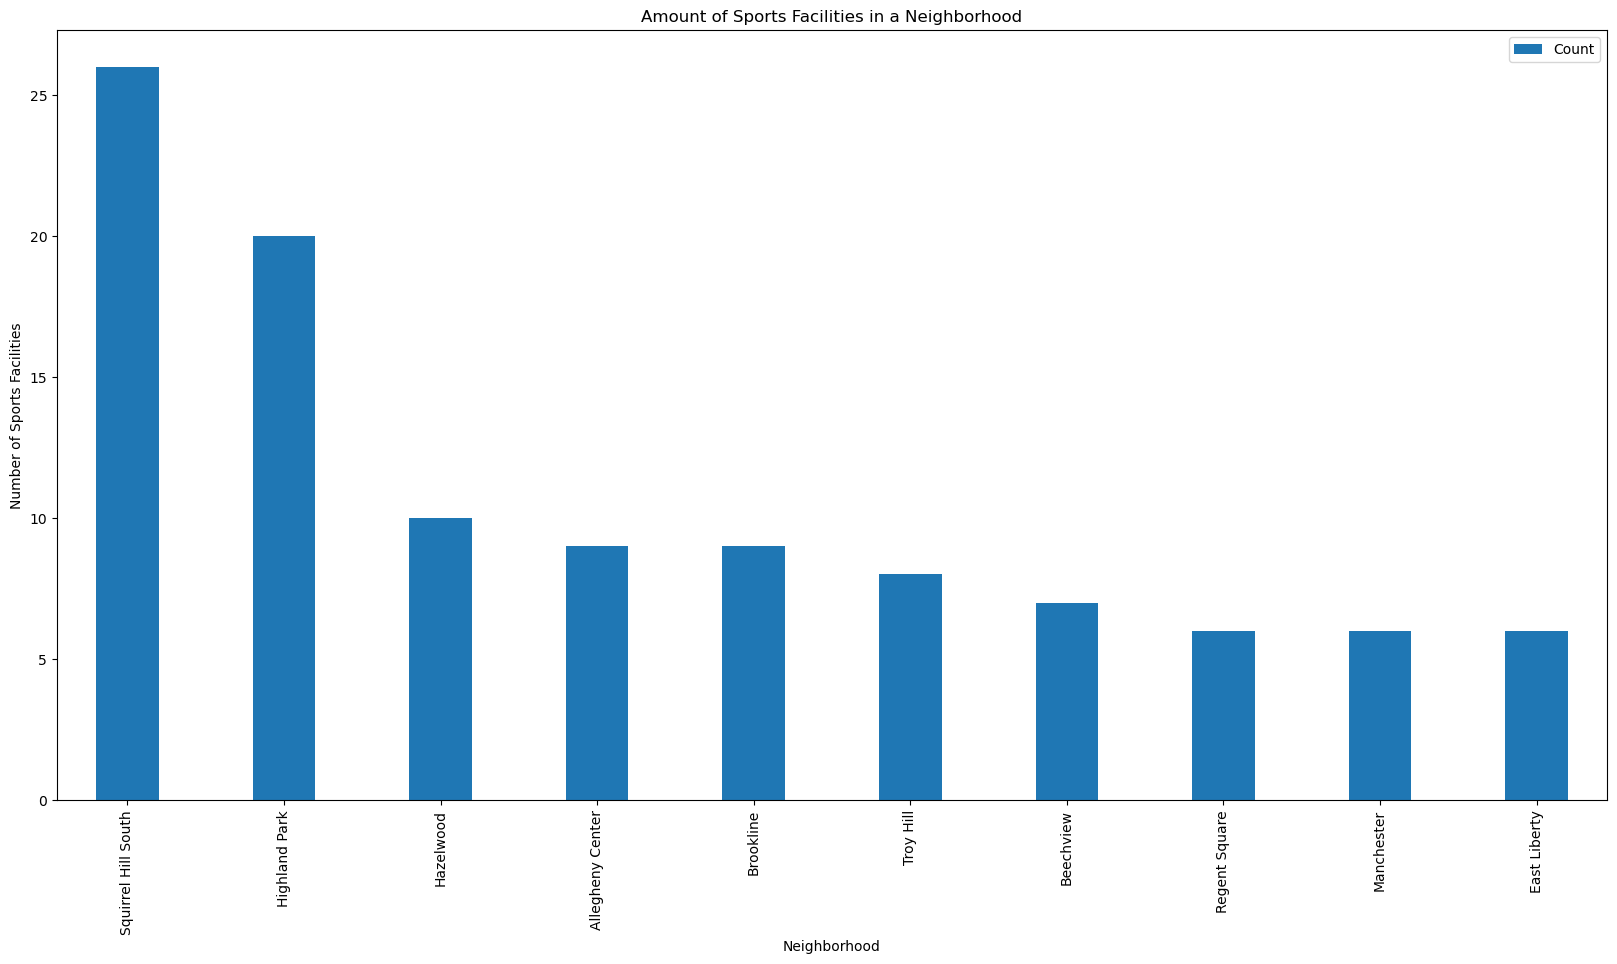

In [34]:
sports_10 = sports_by_neighborhood.head(10)

sports_plt = sports_10.plot(x = 'Neighborhood', y = 'Count', kind = 'bar', width = .4, figsize = (20, 10))
sports_plt.set_xlabel('Neighborhood')
sports_plt.set_ylabel('Number of Sports Facilities')
sports_plt.set_title('Amount of Sports Facilities in a Neighborhood')
sports_plt.tight_layout()
sports_plt.show()